<a href="https://colab.research.google.com/github/Melikakmm/CLPBgroup17/blob/main/Exercise_4/Question_1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data generation with different N :

In [ ]:
pip install tsfresh

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from tsfresh import extract_features

from xgboost import XGBClassifier, plot_tree

%run /content/plot.py

In [2]:

np.random.seed(12345)


jump = lambda drift, stdev: int(np.random.normal(drift,stdev))

for i in range(10):
    print(jump(5,50))


def pattern(i,z,a):
    return int(a*np.sin((np.pi*i)/z))

-5
28
-20
-22
103
74
9
19
43
67


In [3]:
# random seed for reproducibility
np.random.seed(12345)

# pattern parameters: Z=nr of steps, A=amplitude
Z=12
A=500

# size of each sample of the timeseries
L=60
# step parameters: introduce small positive bias 
DX = 50
bias = 5
n = [20, 50, 100, 150, 200, 250, 300, 400, 500]



for N in [20, 50, 100, 150, 200, 250, 300, 400, 500]:
          globals()['y_{}'.format(N)] = [0] * N
          globals()['x_{}'.format(N)] = [[0] * L for i in range(N)]

          for i in range(N):
              if i>0:
                  globals()['x_{}'.format(N)][i][0] = globals()['x_{}'.format(N)][i-1][-1] + jump(bias,DX)
              
              for j in range(1,L):
                  globals()['x_{}'.format(N)][i][j] = globals()['x_{}'.format(N)][i][j-1] + jump(bias,DX)
                  
              globals()['y_{}'.format(N)][i] = i % 3
              if globals()['y_{}'.format(N)][i]>0:
                  j0 = np.random.randint(0,L-1-Z)
                  sign = 3-2*globals()['y_{}'.format(N)][i]
                  for j in range(Z):
                      globals()['x_{}'.format(N)][i][j0+j] += sign*pattern(j,Z,A)








    

#Show_data(x,L,"original data")

#print(len(x))

for N in n:
  globals()['x_{}'.format(N)] = np.array(globals()['x_{}'.format(N)])
  globals()['y_{}'.format(N)] = np.array(globals()['y_{}'.format(N)])

print(x_20)
print(y_20)

[[   0   -5   23 ...  163  169  211]
 [ 183  231  235 ...  623  619  657]
 [ 580  623  678 ...  804  789  732]
 ...
 [4446 4459 4404 ... 4692 4696 4716]
 [4708 4725 4788 ... 5375 5381 5360]
 [5340 5270 5299 ... 4722 4772 4746]]
[0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1 2 0 1]


In [4]:
# we did not use the rescaling data, but we put here anyways


#def RESCALE(x, N):
#  for i in range(0, N):
#    for l in range(0, L):
#      xm = np.mean(x[i])
#      x[i][l] = x[i][l]-xm
#      x = x / np.var(x)
#  return  


In [ ]:
#for N in n:
#  RESCALE(globals()['x_{}'.format(N)], N)



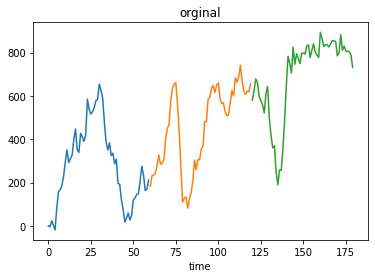

In [5]:
Show_data(x_20, L, 'orginal')


In [6]:
#we added an extra attribute to get_df function in order to involve N too


def get_df(x, N):
    

    N, t = x.shape[0], x.shape[1]

    id_col = np.repeat(np.arange(N),t)

    time_col = np.tile(np.arange(t),N)

    x_col = x.flatten()
      

    x_dict = {'id':id_col,'time':time_col,'value':x_col}

    return pd.DataFrame(x_dict)

In [7]:
#the DataFrames are df_N for N samples

for N in n:
  globals()['df_{}'.format(N)] = get_df(globals()['x_{}'.format(N)], N)

In [8]:
#for example:
df_20

,id,time,value
0,0,0,0
1,0,1,-5
2,0,2,23
3,0,3,3
4,0,4,-19
...,...,...,...
1195,19,55,4754
1196,19,56,4734
1197,19,57,4722
1198,19,58,4772


In [9]:
for N in n:  
   globals()['x_features_{}'.format(N)] = extract_features(
                            globals()['df_{}'.format(N)], #our dataframe
                            column_id='id', #sample id, from 0 to N
                            column_sort='time', #timestep, from 0 to t
                            column_kind=None, #we have only one feature
                            column_value='value', #value of input 
                            n_jobs=4) #number of cores

Feature Extraction: 100%|██████████| 20/20 [00:30<00:00,  1.53s/it]


In [10]:
#now DataFrames are like x_features_N for N samples
#for example:

x_features_100


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,"value__matrix_profile__feature_""min""__threshold_0.98","value__matrix_profile__feature_""max""__threshold_0.98","value__matrix_profile__feature_""mean""__threshold_0.98","value__matrix_profile__feature_""median""__threshold_0.98","value__matrix_profile__feature_""25""__threshold_0.98","value__matrix_profile__feature_""75""__threshold_0.98",value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,3245.0,1.147531e+06,41.593220,2.576271,-0.646552,70.0,...,3.796177,3.911968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.142857
1,1.0,0.0,0.0,1.0,25059.0,1.438074e+07,43.830508,10.305085,0.655172,467.0,...,3.502549,3.655247,NaN,0.693637,3.547879,1.673207,1.691075,1.066489,2.171866,844.142857
2,1.0,0.0,0.0,1.0,61017.0,6.562040e+07,46.474576,12.644068,0.422414,940.0,...,3.856101,3.911968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1432.428571
3,1.0,0.0,0.0,1.0,92584.0,1.432742e+08,32.813559,2.033898,-0.931034,1557.5,...,3.906512,3.988984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1669.000000
4,1.0,0.0,0.0,1.0,84380.0,1.199662e+08,46.305085,-0.067797,0.172414,1395.0,...,3.786663,3.988984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1722.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,1.0,1.0,1098852.0,2.012783e+10,52.610169,-1.220339,-0.517241,18325.5,...,3.675070,3.809279,NaN,0.790300,3.621311,1.848901,1.787209,1.145354,2.476728,18597.285714
96,1.0,0.0,0.0,1.0,1119886.0,2.090332e+10,36.610169,5.288136,0.189655,18653.5,...,3.711047,3.825262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18886.000000
97,1.0,0.0,0.0,1.0,1128443.0,2.122532e+10,46.745763,-0.406780,-0.293103,18829.5,...,3.674542,3.839962,NaN,0.878130,3.190822,1.714547,1.529958,1.115031,2.260248,19168.714286
98,1.0,0.0,1.0,1.0,1111344.0,2.058627e+10,45.474576,-5.406780,-0.810345,18504.0,...,3.821382,3.911968,NaN,1.215503,4.052973,2.504950,2.392358,1.988872,3.047733,18729.000000


In [11]:
for N in n:

    globals()['x_features_{}'.format(N)].replace([np.inf, -np.inf], np.nan)
    globals()['x_features_{}'.format(N)] = globals()['x_features_{}'.format(N)].dropna(axis='columns')


In [12]:
#clean data is ready for different sample numbers
x_features_100

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,3245.0,1.147531e+06,41.593220,2.576271,-0.646552,70.0,...,0.239217,0.379535,0.563420,1.192692,1.739146,2.701986,3.492872,3.796177,3.911968,239.142857
1,1.0,0.0,0.0,1.0,25059.0,1.438074e+07,43.830508,10.305085,0.655172,467.0,...,0.379535,0.518700,0.563420,0.973558,1.539644,2.485559,3.099347,3.502549,3.655247,844.142857
2,1.0,0.0,0.0,1.0,61017.0,6.562040e+07,46.474576,12.644068,0.422414,940.0,...,0.283936,0.457102,0.656671,1.134027,1.714813,2.803311,3.525735,3.856101,3.911968,1432.428571
3,1.0,0.0,0.0,1.0,92584.0,1.432742e+08,32.813559,2.033898,-0.931034,1557.5,...,0.473981,0.563420,0.563420,2.116209,1.729276,2.857091,3.585825,3.906512,3.988984,1669.000000
4,1.0,0.0,0.0,1.0,84380.0,1.199662e+08,46.305085,-0.067797,0.172414,1395.0,...,0.142506,0.283936,0.424254,0.973558,1.604047,2.532614,3.318349,3.786663,3.988984,1722.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,0.0,1.0,1.0,1098852.0,2.012783e+10,52.610169,-1.220339,-0.517241,18325.5,...,0.457102,0.611952,0.793400,1.150906,1.658864,2.594745,3.238767,3.675070,3.809279,18597.285714
96,1.0,0.0,0.0,1.0,1119886.0,2.090332e+10,36.610169,5.288136,0.189655,18653.5,...,0.283936,0.424254,0.424254,1.150906,1.656240,2.589594,3.324417,3.711047,3.825262,18886.000000
97,1.0,0.0,0.0,1.0,1128443.0,2.122532e+10,46.745763,-0.406780,-0.293103,18829.5,...,0.379535,0.518700,0.563420,1.220532,1.642557,2.652253,3.321944,3.674542,3.839962,19168.714286
98,1.0,0.0,1.0,1.0,1111344.0,2.058627e+10,45.474576,-5.406780,-0.810345,18504.0,...,0.283936,0.283936,0.424254,0.973558,1.693443,2.814019,3.496467,3.821382,3.911968,18729.000000


In [48]:
from sklearn.model_selection import train_test_split

#split data into training and validation
n_class = 3
perc_train=0.8
for N in n:

  globals()['N_train_{}'.format(N)] = int(perc_train*N)
  globals()['x_train_{}'.format(N)] = globals()['x_features_{}'.format(N)][:globals()['N_train_{}'.format(N)]]
  globals()['y_train_{}'.format(N)] = globals()['y_{}'.format(N)][:globals()['N_train_{}'.format(N)]]

  globals()['x_valid_{}'.format(N)] = globals()['x_features_{}'.format(N)][globals()['N_train_{}'.format(N)]: ]
  globals()['y_valid_{}'.format(N)] = globals()['y_{}'.format(N)][globals()['N_train_{}'.format(N)]:]

  globals()['N_val_{}'.format(N)] = len(globals()['x_valid_{}'.format(N)])


print('N_train_100=',N_train_100,'  N_val_100=',N_val_100,'  n_class=',n_class)

#split data into train and valid for independent train and test
#the point in this spliting method is that, the amount of inputs with specific categories can 
#be found with the same percentage in both valid and test set.


#for N in n:

#   globals()['x_train_{}'.format(N)], globals()['x_valid_{}'.format(N)], globals()['y_train_{}'.format(N)],globals()[ 'y_valid_{}'.format(N) ]= train_test_split(globals()['x_features_{}'.format(N)], globals()['y_{}'.format(N)], test_size=0.20, random_state=12345, shuffle = True,  stratify=None)

#rescale: in each feature, remove average and divide by std
 

N_train_100= 80   N_val_100= 20   n_class= 3


In [38]:
x_train_100

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,3245.0,1.147531e+06,41.593220,2.576271,-0.646552,70.0,...,0.239217,0.379535,0.563420,1.192692,1.739146,2.701986,3.492872,3.796177,3.911968,239.142857
1,1.0,0.0,0.0,1.0,25059.0,1.438074e+07,43.830508,10.305085,0.655172,467.0,...,0.379535,0.518700,0.563420,0.973558,1.539644,2.485559,3.099347,3.502549,3.655247,844.142857
2,1.0,0.0,0.0,1.0,61017.0,6.562040e+07,46.474576,12.644068,0.422414,940.0,...,0.283936,0.457102,0.656671,1.134027,1.714813,2.803311,3.525735,3.856101,3.911968,1432.428571
3,1.0,0.0,0.0,1.0,92584.0,1.432742e+08,32.813559,2.033898,-0.931034,1557.5,...,0.473981,0.563420,0.563420,2.116209,1.729276,2.857091,3.585825,3.906512,3.988984,1669.000000
4,1.0,0.0,0.0,1.0,84380.0,1.199662e+08,46.305085,-0.067797,0.172414,1395.0,...,0.142506,0.283936,0.424254,0.973558,1.604047,2.532614,3.318349,3.786663,3.988984,1722.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.0,0.0,0.0,1.0,849279.0,1.202309e+10,41.762712,2.271186,-0.879310,14135.0,...,0.142506,0.283936,0.424254,1.150906,1.650881,2.689129,3.468116,3.846587,3.963312,14428.428571
76,1.0,0.0,0.0,1.0,838250.0,1.171386e+10,52.322034,-6.593220,0.637931,13933.5,...,0.379535,0.424254,0.563420,0.838120,1.624508,2.529540,3.139314,3.515582,3.783607,14303.571429
77,1.0,1.0,0.0,1.0,829639.0,1.147388e+10,50.305085,3.322034,1.146552,13807.5,...,0.283936,0.424254,0.424254,1.089308,1.620549,2.666336,3.346182,3.625917,3.788618,14082.428571
78,1.0,0.0,0.0,1.0,837506.0,1.169083e+10,38.135593,-4.305085,0.043103,13974.5,...,0.283936,0.457102,0.656671,1.874245,1.727770,2.728030,3.477460,3.830896,3.963312,14116.714286


In [ ]:
#Rescaling gives us missmatch error, the reason is that for some columns we have std = 0, and when we divide the whole column to 0, 
#we get Nan, and XGBOOST is not very good with Nan values.


#if True:
#  for N in n:


#    av1 = np.mean( globals()['x_train_{}'.format(N)],axis=0)
#   av2 = np.mean( globals()['x_valid_{}'.format(N)],axis=0)

#   globals()['x_train_{}'.format(N)] -= av1
#   globals()['x_valid_{}'.format(N)] -= av2

#   std1 = np.std(globals()['x_train_{}'.format(N)],axis=0)
#   std2 = np.std(globals()['x_valid_{}'.format(N)],axis=0)


#   globals()['x_train_{}'.format(N)] /= std1
#   globals()['x_valid_{}'.format(N)] /= std2




#for N in n:
#  globals()['x_train_{}'.format(N)].drop(['value__has_duplicate', 'value__has_duplicate_min', 'value__variance_larger_than_standard_deviation'], axis = 1, inplace = True)



In [20]:
x_train_20

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,16750.0,6729150.0,43.101695,3.576271,0.405172,289.5,...,0.283936,0.424254,0.424254,0.980757,1.606551,2.560840,3.232518,3.608440,3.809279,594.571429
1,1.0,0.0,0.0,1.0,27302.0,14556188.0,44.000000,8.033898,-0.086207,509.5,...,0.379535,0.379535,0.518700,1.107653,1.547018,2.436717,3.108691,3.462655,3.659720,681.142857
2,1.0,0.0,0.0,1.0,41650.0,30904786.0,45.491525,2.576271,-0.862069,784.0,...,0.142506,0.379535,0.424254,1.107653,1.745508,2.930054,3.743700,4.007333,3.988984,863.285714
3,1.0,0.0,0.0,1.0,37428.0,23935100.0,44.372881,-2.169492,1.008621,631.0,...,0.473981,0.687083,1.320351,2.757282,1.695334,2.879917,3.584589,3.871793,3.937640,784.428571
4,1.0,0.0,0.0,1.0,58260.0,60723594.0,54.593220,10.728814,-0.422414,909.0,...,0.379535,0.424254,0.656671,0.838120,1.668815,2.785780,3.277698,3.575507,3.773917,1389.857143
5,1.0,0.0,0.0,1.0,89485.0,137140845.0,45.644068,10.830508,0.344828,1555.0,...,0.142506,0.283936,0.518700,0.973558,1.599230,2.487335,3.115795,3.544123,3.799589,1850.571429
6,1.0,1.0,0.0,1.0,120965.0,244298969.0,39.559322,3.152542,0.318966,2030.5,...,0.550354,0.611952,0.911897,2.253535,1.577740,2.540774,3.234221,3.725480,3.902278,2129.000000
7,1.0,0.0,0.0,1.0,130625.0,287046061.0,53.457627,5.050847,0.232759,2141.0,...,0.283936,0.424254,0.424254,0.701390,1.763222,2.840769,3.625992,3.931717,3.988984,2623.571429
8,1.0,0.0,0.0,1.0,153223.0,394072457.0,52.220339,11.169492,-0.094828,2475.0,...,0.283936,0.283936,0.283936,0.701390,1.638909,2.608286,3.393851,3.805690,3.937640,2905.571429
9,1.0,0.0,0.0,1.0,181771.0,551550183.0,41.016949,-2.033898,-0.077586,3033.0,...,0.142506,0.379535,0.518700,1.396298,1.755439,2.915227,3.581313,3.811869,3.876606,3220.285714


#The XGBOOST model

In [22]:
np.random.seed(12345)

params = {'max_depth':10,'min_child_weight':1,\
              'learning_rate':0.2,'use_label_encoder':False}

model = XGBClassifier(**params)

for N in n:
    globals()['model_{}'.format(N)] = model.fit(globals()['x_train_{}'.format(N)].values,globals()['y_train_{}'.format(N)])

For sake of readibility we just plotted one model with N = 20.

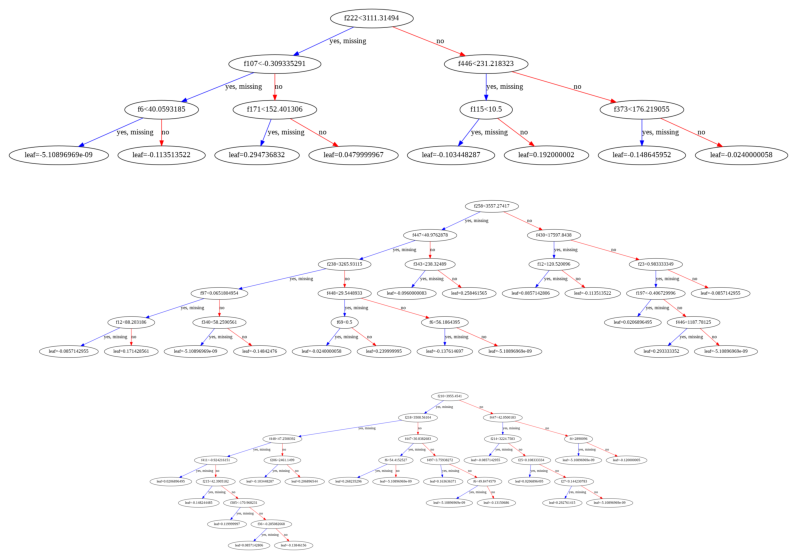

In [23]:
fig, AX = plt.subplots(3,1,figsize=(30, 10))
for i in range(3):
    ax=AX[i]
    plot_tree(model_20, num_trees=i, ax=ax)


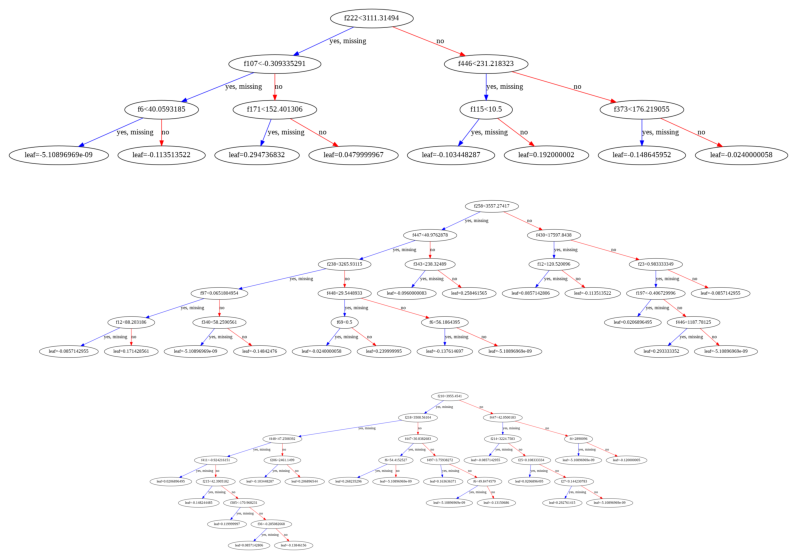

In [24]:
fig, AX = plt.subplots(3,1,figsize=(30, 10))
for i in range(3):
    ax=AX[i]
    plot_tree(model_500, num_trees=i, ax=ax)

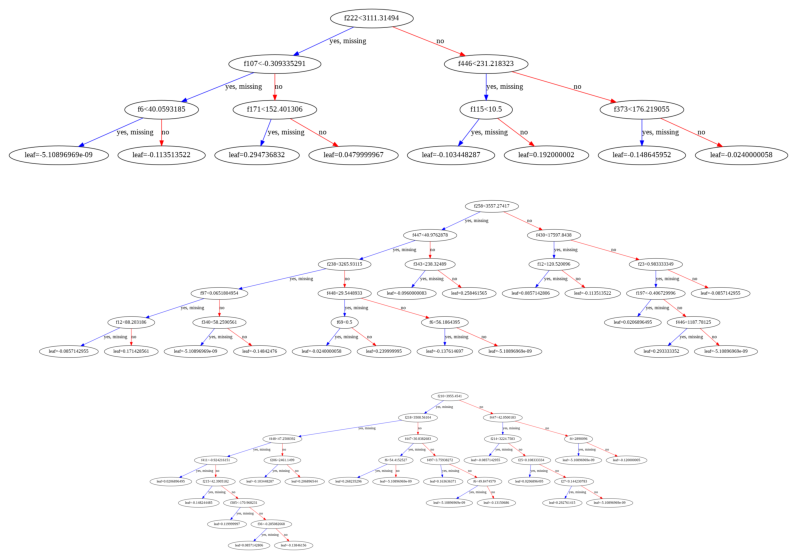

In [25]:
fig, AX = plt.subplots(3,1,figsize=(30, 10))
for i in range(3):
    ax=AX[i]
    plot_tree(model_200, num_trees=i, ax=ax)

In [26]:
x_train_100.sort_index()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,3245.0,1.147531e+06,41.593220,2.576271,-0.646552,70.0,...,0.239217,0.379535,0.563420,1.192692,1.739146,2.701986,3.492872,3.796177,3.911968,239.142857
1,1.0,0.0,0.0,1.0,25059.0,1.438074e+07,43.830508,10.305085,0.655172,467.0,...,0.379535,0.518700,0.563420,0.973558,1.539644,2.485559,3.099347,3.502549,3.655247,844.142857
2,1.0,0.0,0.0,1.0,61017.0,6.562040e+07,46.474576,12.644068,0.422414,940.0,...,0.283936,0.457102,0.656671,1.134027,1.714813,2.803311,3.525735,3.856101,3.911968,1432.428571
3,1.0,0.0,0.0,1.0,92584.0,1.432742e+08,32.813559,2.033898,-0.931034,1557.5,...,0.473981,0.563420,0.563420,2.116209,1.729276,2.857091,3.585825,3.906512,3.988984,1669.000000
4,1.0,0.0,0.0,1.0,84380.0,1.199662e+08,46.305085,-0.067797,0.172414,1395.0,...,0.142506,0.283936,0.424254,0.973558,1.604047,2.532614,3.318349,3.786663,3.988984,1722.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1.0,0.0,0.0,1.0,849279.0,1.202309e+10,41.762712,2.271186,-0.879310,14135.0,...,0.142506,0.283936,0.424254,1.150906,1.650881,2.689129,3.468116,3.846587,3.963312,14428.428571
76,1.0,0.0,0.0,1.0,838250.0,1.171386e+10,52.322034,-6.593220,0.637931,13933.5,...,0.379535,0.424254,0.563420,0.838120,1.624508,2.529540,3.139314,3.515582,3.783607,14303.571429
77,1.0,1.0,0.0,1.0,829639.0,1.147388e+10,50.305085,3.322034,1.146552,13807.5,...,0.283936,0.424254,0.424254,1.089308,1.620549,2.666336,3.346182,3.625917,3.788618,14082.428571
78,1.0,0.0,0.0,1.0,837506.0,1.169083e+10,38.135593,-4.305085,0.043103,13974.5,...,0.283936,0.457102,0.656671,1.874245,1.727770,2.728030,3.477460,3.830896,3.963312,14116.714286


In [27]:
x_train_20

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_3,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__mean_n_absolute_max__number_of_maxima_7
0,1.0,0.0,0.0,1.0,16750.0,6729150.0,43.101695,3.576271,0.405172,289.5,...,0.283936,0.424254,0.424254,0.980757,1.606551,2.560840,3.232518,3.608440,3.809279,594.571429
1,1.0,0.0,0.0,1.0,27302.0,14556188.0,44.000000,8.033898,-0.086207,509.5,...,0.379535,0.379535,0.518700,1.107653,1.547018,2.436717,3.108691,3.462655,3.659720,681.142857
2,1.0,0.0,0.0,1.0,41650.0,30904786.0,45.491525,2.576271,-0.862069,784.0,...,0.142506,0.379535,0.424254,1.107653,1.745508,2.930054,3.743700,4.007333,3.988984,863.285714
3,1.0,0.0,0.0,1.0,37428.0,23935100.0,44.372881,-2.169492,1.008621,631.0,...,0.473981,0.687083,1.320351,2.757282,1.695334,2.879917,3.584589,3.871793,3.937640,784.428571
4,1.0,0.0,0.0,1.0,58260.0,60723594.0,54.593220,10.728814,-0.422414,909.0,...,0.379535,0.424254,0.656671,0.838120,1.668815,2.785780,3.277698,3.575507,3.773917,1389.857143
5,1.0,0.0,0.0,1.0,89485.0,137140845.0,45.644068,10.830508,0.344828,1555.0,...,0.142506,0.283936,0.518700,0.973558,1.599230,2.487335,3.115795,3.544123,3.799589,1850.571429
6,1.0,1.0,0.0,1.0,120965.0,244298969.0,39.559322,3.152542,0.318966,2030.5,...,0.550354,0.611952,0.911897,2.253535,1.577740,2.540774,3.234221,3.725480,3.902278,2129.000000
7,1.0,0.0,0.0,1.0,130625.0,287046061.0,53.457627,5.050847,0.232759,2141.0,...,0.283936,0.424254,0.424254,0.701390,1.763222,2.840769,3.625992,3.931717,3.988984,2623.571429
8,1.0,0.0,0.0,1.0,153223.0,394072457.0,52.220339,11.169492,-0.094828,2475.0,...,0.283936,0.283936,0.283936,0.701390,1.638909,2.608286,3.393851,3.805690,3.937640,2905.571429
9,1.0,0.0,0.0,1.0,181771.0,551550183.0,41.016949,-2.033898,-0.077586,3033.0,...,0.142506,0.379535,0.518700,1.396298,1.755439,2.915227,3.581313,3.811869,3.876606,3220.285714


In [42]:
blacklist=['xgboost']




In [54]:
from sklearn.metrics import accuracy_score


y_pred_train = model_500.predict(x_train_500.values)

y_pred_val = model_500.predict(x_valid_500.values)

y_pred_val_soft = model.predict_proba(x_valid_500.values)




acc_train_500 = accuracy_score(y_train_500,y_pred_train) 
acc_val_500 = accuracy_score(y_valid_500,y_pred_val)


print('Training accuracy:',acc_train_500)
print('Validation accuracy:',acc_val_500)

Training accuracy: 1.0
Validation accuracy: 0.92


In [51]:

y_pred_train_250 = model_250.predict(x_train_250.values)

y_pred_val_250 = model_250.predict(x_valid_250.values)

y_pred_val_soft = model_250.predict_proba(x_valid_250.values)



acc_train_250 = accuracy_score(y_train_250,y_pred_train_250) 
acc_val_250 = accuracy_score(y_valid_250,y_pred_val_250)


print('Training accuracy:',acc_train_250)
print('Validation accuracy:',acc_val_250)

Training accuracy: 0.91
Validation accuracy: 0.92


In [45]:
y_pred_train_400 = model_400.predict(x_train_400.values)

y_pred_val_400 = model_400.predict(x_valid_400.values)

y_pred_val_soft = model_400.predict_proba(x_valid_400.values)



acc_train_400 = accuracy_score(y_train_400,y_pred_train_400) 
acc_val_400 = accuracy_score(y_valid_400,y_pred_val_400)


print('Training accuracy:',acc_train_400)
print('Validation accuracy:',acc_val_400)

Training accuracy: 0.909375
Validation accuracy: 0.95


In [47]:
y_pred_train_300 = model_300.predict(x_train_300.values)

y_pred_val_300 = model_300.predict(x_valid_300.values)

y_pred_val_soft = model_300.predict_proba(x_valid_300.values)



acc_train_300 = accuracy_score(y_train_300,y_pred_train_300) 
acc_val_300 = accuracy_score(y_valid_300,y_pred_val_300)


print('Training accuracy:',acc_train_300)
print('Validation accuracy:',acc_val_300)

Training accuracy: 0.9125
Validation accuracy: 0.95


In [ ]:
#this is the actual model for predicting, it's more complicated, but has the same error as previous one

#from sklearn.metrics import accuracy_score

#for N in n:
#  globals()['y_pred_train_{}'.format(N)] = globals()['model_{}'.format(N)].predict(globals()['x_train_{}'.format(N)].values)
#  globals()['y_pred_valid_{}'.format(N)] = globals()['model_{}'.format(N)].predict(globals()['x_valid_{}'.format(N)])
#  globals()['y_pred_valid_{}_soft'.format(N)] =  globals()['model_{}'.format(N)].predict_proba(globals()['x_valid_{}'.format(N)])


#  globals()['acc_train_{}'.format(N)] = accuracy_score(globals()['y_train_{}'.format(N)],globals()['y_pred_train_{}'.format(N)] )
#  globals()['acc_valid_{}'.format(N)] = accuracy_score(globals()['y_valid_{}'.format(N)],globals()['y_pred_valid_{}'.format(N)] )



#  print('acc_train_{} :'.format(N), globals()['acc_train_{}'.format(N)])
#  print('acc_valid_{} :'.format(N), globals()['acc_valid_{}'.format(N)])
#  print('_______________________________________________________________')


Adding CNN model

In [79]:
np.random.seed(12345)
import tensorflow.random as tf_r
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D



input_shape = (L, 1)

tf_r.set_seed(12345)

## from keras import regularizers, initializers

reg = tf.keras.regularizers.l2(0.2) ## raised to 0.2
#reg = regularizers.l1(0.1)
ini = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, 
                                        seed=None)
NCONV = 1
NF = 5

# challenge: at most 600 tunable parameters
model = Sequential()
# 
if NCONV==1:
    # -----2-----
    model.add(Conv1D(filters=NF, kernel_size=11, 
                     kernel_initializer=ini, 
                     kernel_regularizer=reg,
                     activation='relu', 
                     input_shape=input_shape))
    #model.add(MaxPooling1D(3))
    model.add(AveragePooling1D(5))
    model.add(Conv1D(filters=5, kernel_size=7, 
                     activation='relu'))
    model.add(Flatten())
    model.add(Dense(12, activation='relu'))
    model.add(Dropout(0.2))
# 
if NCONV==2:
    # -----1-----
    model.add(Conv1D(filters=NF, kernel_size=11, 
                     kernel_initializer=ini, 
                     kernel_regularizer=reg, ######## TRY WITHOUT !
                     activation='relu', input_shape=input_shape))
    #model.add(MaxPooling1D(3))
    model.add(AveragePooling1D(5))
    model.add(Flatten())
    model.add(Dense(9, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='relu'))
    model.add(Dropout(0.2))
    #model.add(Dense(10, activation='relu'))
    #model.add(Dropout(0.3))
model.add(Dense(n_class, activation='softmax')) # softmax !

print('----- Model',NCONV,'-----')
print(model.summary())

# optimizers
# .SGD(lr=0.01, momentum=0.9, nesterov=True) # decay=1e-6,
# .RMSprop()
# .Nadam()
opt = tf.keras.optimizers.Adam()

# compile the model
# categorical_crossentropy, 3 output nodes
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=opt,metrics=['accuracy'])

----- Model 1 -----
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_12 (Conv1D)          (None, 50, 5)             60        
                                                                 
 average_pooling1d_6 (Averag  (None, 10, 5)            0         
 ePooling1D)                                                     
                                                                 
 conv1d_13 (Conv1D)          (None, 4, 5)              180       
                                                                 
 flatten_6 (Flatten)         (None, 20)                0         
                                                                 
 dense_12 (Dense)            (None, 12)                252       
                                                                 
 dropout_6 (Dropout)         (None, 12)                0         
                                  

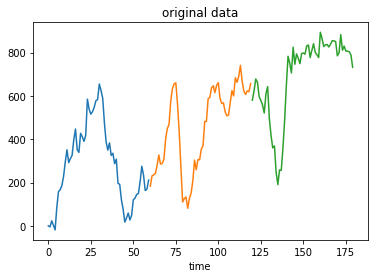

data:  500


In [83]:
N_500c = 500

x_500c = np.loadtxt('/content/x_ts_L60_Z12_A500_DX50_bias5_N500.dat', delimiter=" ",dtype=float)
N_500c,L = len(x_500c), len(x_500c[0])

Show_data(x_500c,L,"original data")

categ = np.loadtxt('/content/y_ts_L60_Z12_A500_DX50_bias5_N500.dat', dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y_500c = np.zeros((N_500,n_class))
for i in range(N):
    y_500c[i][categ[i]] = 1.

In [88]:

perc_train=0.8
N_train_500c = int(perc_train*N)
x_train_500c = x_500c[:N_train_500c]
y_train_500c = y_500c[:N_train_500c]
x_valid_500c = x_500c[N_train_500c:]
y_valid_500c = y_500c[N_train_500c:]
N_valid_500c = len(x_valid_500c)
print('N_train=',N_train_500c,'  N_val=',N_valid_500c,'  L=',L,'  n_class=',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

# Keras wants an additional dimension with a 1 at the end
x_train_500c = x_train_500c.reshape(x_train_500c.shape[0], L, 1)
x_valid_500c =  x_valid_500c.reshape(x_valid_500c.shape[0], L, 1)
input_shape = (L, 1)

N_train= 400   N_val= 100   L= 60   n_class= 3


In [ ]:
BATCH_SIZE = 250
EPOCHS = 100






fit = model.fit(x_train_500c,y_train_500c, batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_valid_500c, y_valid_500c))  


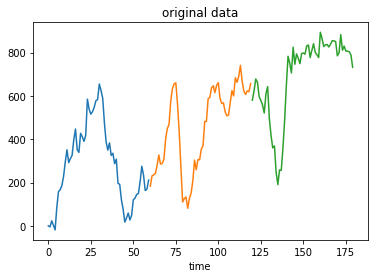

data:  500


In [91]:
N_300c = 300
x_300c = np.loadtxt('/content/x_ts_L60_Z12_A500_DX50_bias5_N300.dat', delimiter=" ",dtype=float)
N_300c,L = len(x_300c), len(x_300c[0])

Show_data(x_300c,L,"original data")

categ_300c = np.loadtxt('/content/y_ts_L60_Z12_A500_DX50_bias5_N300.dat', dtype=int)
n_class = 3    # y.argmax() - y.argmin() +1
print('data: ',N)

y_300c = np.zeros((N_300c,n_class))
for i in range(N_300c):
    y_300c[i][categ[i]] = 1.

In [92]:
perc_train=0.8
N_train_300c = int(perc_train*N_300c)
x_train_300c = x_300c[:N_train_300c]
y_train_300c = y_300c[:N_train_300c]
x_valid_300c = x_300c[N_train_300c:]
y_valid_300c = y_300c[N_train_300c:]
N_valid_300c = len(x_valid_300c)
print('N_train=',N_train_300c,'  N_val=',N_valid_300c,'  L=',L,'  n_class=',n_class)

#x_train=x_train.astype("float32")
#y_train=y_train.astype("float32")
#x_val=x_val.astype("float32")
#y_val=y_val.astype("float32")

# Keras wants an additional dimension with a 1 at the end
x_train_300c = x_train_300c.reshape(x_train_300c.shape[0], L, 1)
x_valid_300c =  x_valid_300c.reshape(x_valid_300c.shape[0], L, 1)
input_shape = (L, 1)

N_train= 240   N_val= 60   L= 60   n_class= 3


In [ ]:
BATCH_SIZE = 250
EPOCHS = 100






fit = model.fit(x_train_300c,y_train_300c, batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                validation_data=(x_valid_300c, y_valid_300c)) 

In [100]:
import pandas

train_accuracy = [0.9125,1.0,0.3208,0.3400 ]
valid_accuracy = [0.95,0.92,0.3333, 0.3300 ]



col = {'train accuracy': train_accuracy, 'valid accuracy': valid_accuracy}

models = {'XGBOOST_N= 300', 'XGBOOST_N= 500', 'CNN_N=300', 'CNN_N=500'}

pandas.DataFrame(data = col, index = models)

,train accuracy,valid accuracy
XGBOOST_N= 300,0.9125,0.9500
XGBOOST_N= 500,1.0000,0.9200
CNN_N=300,0.3208,0.3333
CNN_N=500,0.3400,0.3300


##Result

We did not use rescaling in both methods, because we understood that rescaling made a lot of Nan values for our XGBOOST dataframe, so we decided not to use rescaling in both of methods to be fair with the compariosion.


Unfortunately, CNN is not working really well in comparison with the XGBOOST model. Therefore for this type of classification, it is better to use XGBOOST.